跑了arima模型后，发现有的节点拟合的很好，有的节点拟合的很差。

下面第一个图中，画出了拟合的好的节点数据和拟合的差的节点数据。可以看出，arima能拟合的是数值变化不剧烈的那些，不能拟合的是数据变化很剧烈的那些。

学术版本是这样描述的：ARIMA适合建模平稳、线性、有短期记忆的单变量时间序列数据。

例如第二个图，ARIMA只能拟合第一个（线性+平稳），拟合不了后两个（非线性、非平稳）。肉眼上无法直观看出区别，是否线性、是否平稳需要用统计检验（RESET检验，ADF检验等）来判断。





milan_10min_T_N_5.h5 already exists in /data/scratch/jiayin/milan
Loading Milan data...
setup data shape:  (7488, 1, 20, 20)


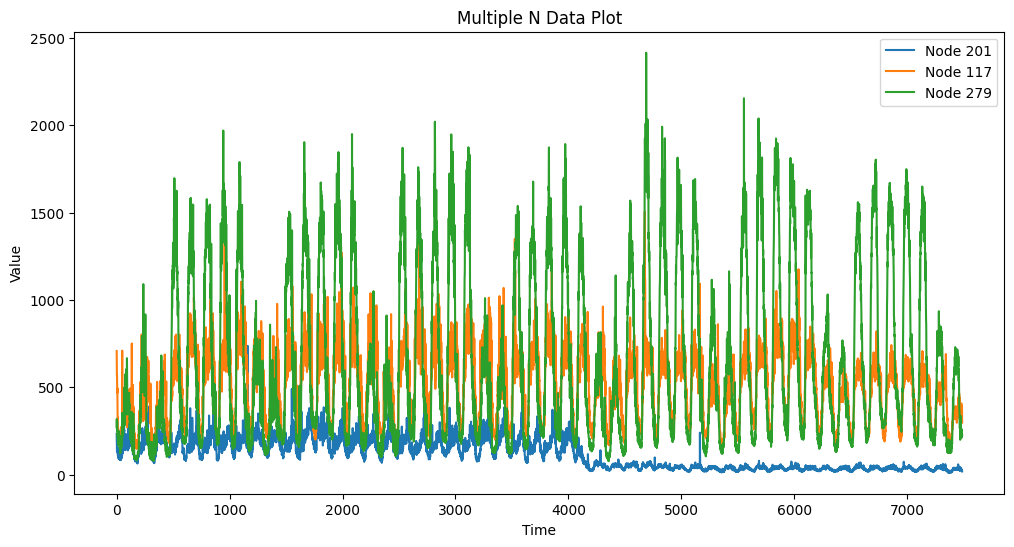

In [5]:
# 检查哪些节点的数据用 arima 拟合的很差
import matplotlib.pyplot as plt
from datasets.Milan import Milan

dataset = Milan(aggr_time='10min',
                time_range='all',
                # grid_range=p['grid_range'],
                load_meta=False,
                normalize=False,
                )
dataset.prepare_data()
dataset.setup()
[train_len, val_len, _] = dataset.get_default_len()
X = dataset.milan_grid_data.squeeze().reshape(-1, dataset.N_all)

# 指定要绘制的 N 数据的索引
# selected_indices = [0, 201, 240, 260,  # 拟合效果贼好
#                     98, 117, 194, 279, # 拟合效果很差
#                     355, 375, 395] # 拟合不出来
selected_indices = [201, 117, 279]

# 创建一个新的图形
plt.figure(figsize=(12, 6))

# 绘制每个选定的 N 数据
for i in selected_indices:
    plt.plot(X[:, i], label=f'Node {i}')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('Multiple N Data Plot')
plt.xlabel('Time')
plt.ylabel('Value')

# 显示图形
plt.show()
plt.close()

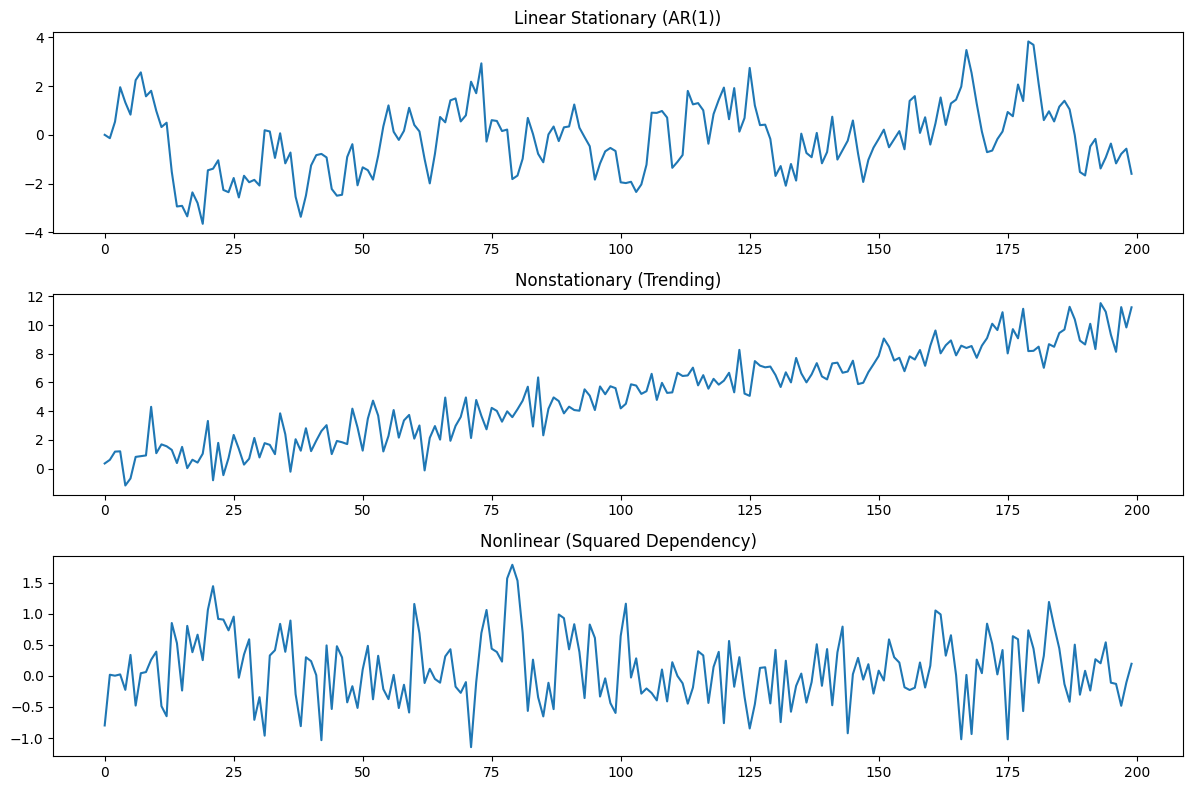

In [7]:
# 画出平稳数据、线性数据
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 设置随机种子，保证可复现
np.random.seed(42)

# 样本数量
T = 200

# 1. 生成一个线性平稳序列：AR(1)模型
# y_t = 0.8 * y_{t-1} + e_t
e = np.random.normal(0, 1, T)
linear_stationary = np.zeros(T)
for t in range(1, T):
    linear_stationary[t] = 0.8 * linear_stationary[t-1] + e[t]

# 2. 生成一个非平稳序列：带趋势的噪声
trend = np.linspace(0, 10, T)  # 线性增长趋势
noise = np.random.normal(0, 1, T)
nonstationary = trend + noise

# 3. 生成一个非线性序列：平方关系
# 生成非线性序列（防止爆炸）
nonlinear = np.zeros(T)
nonlinear[0] = np.random.normal(0, 0.5)  # 初值小
for t in range(1, T):
    nonlinear[t] = 0.5 * (nonlinear[t-1])**2 + np.random.normal(0, 0.5)

# 保存成DataFrame方便查看
df = pd.DataFrame({
    'Linear_Stationary': linear_stationary,
    'Nonstationary': nonstationary,
    'Nonlinear': nonlinear
})

# 可选：保存到csv方便以后用
# df.to_csv('synthetic_time_series.csv', index=False)

# 画图对比（可选）
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df['Linear_Stationary'])
plt.title('Linear Stationary (AR(1))')

plt.subplot(3, 1, 2)
plt.plot(df['Nonstationary'])
plt.title('Nonstationary (Trending)')

plt.subplot(3, 1, 3)
plt.plot(df['Nonlinear'])
plt.title('Nonlinear (Squared Dependency)')

plt.tight_layout()
plt.show()
plt.close()